In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]

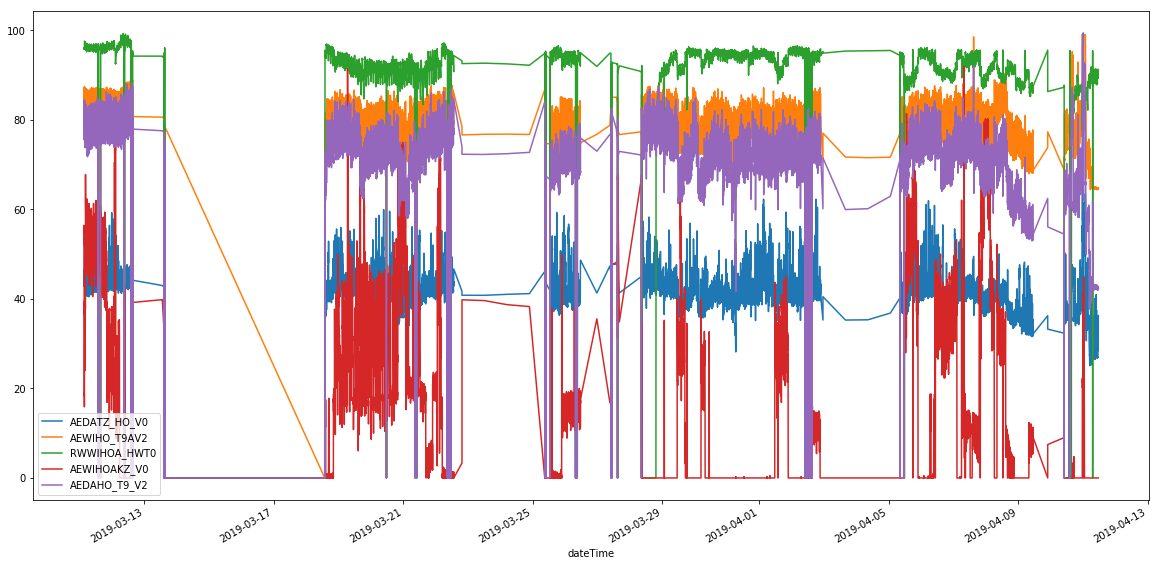

In [8]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [11]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)
multivariate_data_drop_zero=multivariate_data_mean

In [10]:
print(multivariate_data_mean.head())

AEDATZ_HO_V0    41.615423
AEWIHO_T9AV2    76.911482
RWWIHOA_HWT0    88.588305
AEWIHOAKZ_V0    17.272872
AEDAHO_T9_V2    69.896877
dtype: float64


In [47]:
# from numpy import nan
# multivariate_data_drop_zero= multivariate_data.replace(0,nan)
# multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 5)
shape of multivariate_data_drop_zero:  (24500, 5)


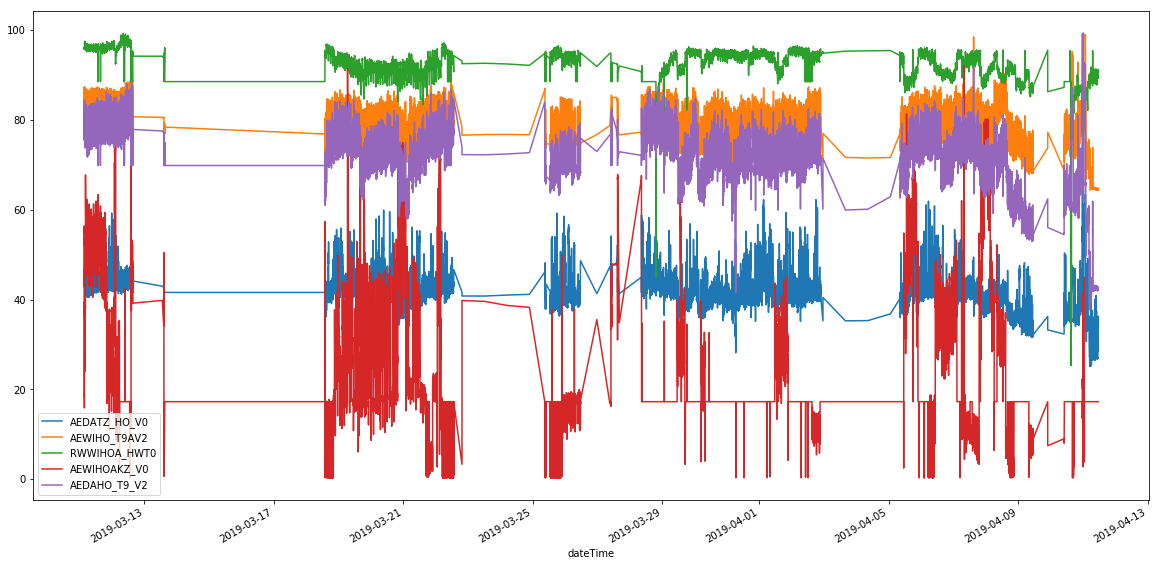

In [12]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [14]:
print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)
# print(dataset)

multivariate_data_drop_zero head: 
                      AEDATZ_HO_V0  AEWIHO_T9AV2  RWWIHOA_HWT0  AEWIHOAKZ_V0  \
dateTime                                                                      
2019-03-11 03:14:00     46.119388     79.178306     96.063659     54.778231   
2019-03-11 03:15:00     46.534541     81.659117     96.103362     54.704687   
2019-03-11 03:16:00     46.555631     86.055430     96.038536     56.415287   
2019-03-11 03:17:00     45.940449     87.113691     95.957508     55.230932   
2019-03-11 03:18:00     44.218947     87.266264     96.018279     53.037212   

                     AEDAHO_T9_V2  
dateTime                           
2019-03-11 03:14:00     83.327361  
2019-03-11 03:15:00     84.314814  
2019-03-11 03:16:00     84.380943  
2019-03-11 03:17:00     83.279853  
2019-03-11 03:18:00     79.963124  


In [16]:
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

Number of Elements for training:  19600
dataset length:  24500
(19600, 5)
(4900, 5)


In [17]:
from numpy import array
# from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
    
n_steps = 1
# convert into input/output
X_multiple_ip, y_multiple_ip = split_sequences(multiple_ip_train_data, n_steps)
print(X_multiple_ip.shape, y_multiple_ip.shape)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

(19600, 1, 4) (19600,)


In [18]:
n_features = X_multiple_ip.shape[2]
print(n_features)

4


In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=1000

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
train_model=model.fit(X_multiple_ip, y_multiple_ip, batch_size=batch_size, epochs=epochs, validation_split=0.2 ,verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/multivariate_1000.h5', 
                                     save_best_only=True)])

Train on 15680 samples, validate on 3920 samples
Epoch 1/1000
15680/15680 [==============================] - 2s 116us/step - loss: 305.5313 - acc: 0.0000e+00 - val_loss: 16.3023 - val_acc: 0.0000e+00
Epoch 2/1000
15680/15680 [==============================] - 1s 85us/step - loss: 214.3422 - acc: 0.0000e+00 - val_loss: 14.6895 - val_acc: 0.0000e+00
Epoch 3/1000
15680/15680 [==============================] - 1s 73us/step - loss: 199.5458 - acc: 0.0000e+00 - val_loss: 31.6184 - val_acc: 0.0000e+00
Epoch 4/1000
15680/15680 [==============================] - 1s 66us/step - loss: 185.7240 - acc: 0.0000e+00 - val_loss: 8.8578 - val_acc: 0.0000e+00
Epoch 5/1000
15680/15680 [==============================] - 1s 67us/step - loss: 176.5719 - acc: 0.0000e+00 - val_loss: 14.5014 - val_acc: 0.0000e+00
Epoch 6/1000
15680/15680 [==============================] - 1s 67us/step - loss: 162.2248 - acc: 0.0000e+00 - val_loss: 8.2618 - val_acc: 0.0000e+00
Epoch 7/1000
15680/15680 [==========================

15680/15680 [==============================] - 1s 63us/step - loss: 86.7764 - acc: 0.0000e+00 - val_loss: 9.8022 - val_acc: 0.0000e+00
Epoch 56/1000
15680/15680 [==============================] - 1s 61us/step - loss: 88.1603 - acc: 0.0000e+00 - val_loss: 9.8015 - val_acc: 0.0000e+00
Epoch 57/1000
15680/15680 [==============================] - 1s 61us/step - loss: 89.0798 - acc: 0.0000e+00 - val_loss: 9.8026 - val_acc: 0.0000e+00
Epoch 58/1000
15680/15680 [==============================] - 1s 61us/step - loss: 87.3564 - acc: 0.0000e+00 - val_loss: 9.8030 - val_acc: 0.0000e+00
Epoch 59/1000
15680/15680 [==============================] - 1s 61us/step - loss: 86.7997 - acc: 0.0000e+00 - val_loss: 9.8035 - val_acc: 0.0000e+00
Epoch 60/1000
15680/15680 [==============================] - 1s 61us/step - loss: 87.9309 - acc: 0.0000e+00 - val_loss: 9.8037 - val_acc: 0.0000e+00
Epoch 61/1000
15680/15680 [==============================] - 1s 61us/step - loss: 85.7756 - acc: 0.0000e+00 - val_loss: 

15680/15680 [==============================] - 1s 64us/step - loss: 86.7460 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 111/1000
15680/15680 [==============================] - 1s 61us/step - loss: 88.9110 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 112/1000
15680/15680 [==============================] - 1s 63us/step - loss: 89.1154 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 113/1000
15680/15680 [==============================] - 1s 63us/step - loss: 89.2379 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 114/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.9444 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 115/1000
15680/15680 [==============================] - 1s 63us/step - loss: 89.0059 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 116/1000
15680/15680 [==============================] - 1s 64us/step - loss: 88.6268 - acc: 0.0000e+00 - val_

Epoch 165/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.0821 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 166/1000
15680/15680 [==============================] - 1s 62us/step - loss: 88.7324 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 167/1000
15680/15680 [==============================] - 1s 61us/step - loss: 88.2739 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 168/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.6462 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 169/1000
15680/15680 [==============================] - 1s 64us/step - loss: 88.6882 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 170/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.3926 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 171/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.4268 - acc: 0.

15680/15680 [==============================] - 1s 64us/step - loss: 88.0218 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 220/1000
15680/15680 [==============================] - 1s 62us/step - loss: 89.5011 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 221/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.8557 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 222/1000
15680/15680 [==============================] - 1s 61us/step - loss: 87.0175 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 223/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.3153 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 224/1000
15680/15680 [==============================] - 1s 61us/step - loss: 87.6180 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 225/1000
15680/15680 [==============================] - 1s 63us/step - loss: 86.9975 - acc: 0.0000e+00 - val_

Epoch 274/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.4586 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 275/1000
15680/15680 [==============================] - 1s 61us/step - loss: 89.6304 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 276/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.0500 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 277/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.0321 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 278/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.9029 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 279/1000
15680/15680 [==============================] - 1s 63us/step - loss: 89.3679 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 280/1000
15680/15680 [==============================] - 1s 65us/step - loss: 88.4330 - acc: 0.

15680/15680 [==============================] - 1s 64us/step - loss: 89.1283 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 329/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.9483 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 330/1000
15680/15680 [==============================] - 1s 61us/step - loss: 89.2370 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 331/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.9341 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 332/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.8658 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 333/1000
15680/15680 [==============================] - 1s 64us/step - loss: 88.4361 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 334/1000
15680/15680 [==============================] - 1s 64us/step - loss: 87.1102 - acc: 0.0000e+00 - val_

Epoch 383/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.9659 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 384/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.0035 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 385/1000
15680/15680 [==============================] - 1s 64us/step - loss: 87.7119 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 386/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.4513 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 387/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.8249 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 388/1000
15680/15680 [==============================] - 1s 64us/step - loss: 89.0350 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 389/1000
15680/15680 [==============================] - 1s 63us/step - loss: 87.8941 - acc: 0.

15680/15680 [==============================] - 2s 103us/step - loss: 89.2731 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 438/1000
15680/15680 [==============================] - 1s 90us/step - loss: 88.1905 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 439/1000
15680/15680 [==============================] - 1s 64us/step - loss: 88.3034 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 440/1000
15680/15680 [==============================] - 1s 63us/step - loss: 88.8079 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 441/1000
15680/15680 [==============================] - 1s 95us/step - loss: 89.1983 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 442/1000
15680/15680 [==============================] - 1s 83us/step - loss: 86.8408 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 443/1000
15680/15680 [==============================] - 1s 65us/step - loss: 90.5442 - acc: 0.0000e+00 - val

Epoch 492/1000
15680/15680 [==============================] - 1s 74us/step - loss: 87.8273 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 493/1000
15680/15680 [==============================] - 1s 75us/step - loss: 88.3756 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 494/1000
15680/15680 [==============================] - 1s 80us/step - loss: 88.3077 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 495/1000
15680/15680 [==============================] - 1s 78us/step - loss: 87.1080 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 496/1000
15680/15680 [==============================] - 1s 85us/step - loss: 88.6020 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 497/1000
15680/15680 [==============================] - 2s 128us/step - loss: 86.9437 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 498/1000
15680/15680 [==============================] - 1s 79us/step - loss: 87.6448 - acc: 0

15680/15680 [==============================] - 1s 64us/step - loss: 89.2142 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 547/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.8399 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 548/1000
15680/15680 [==============================] - 1s 52us/step - loss: 91.1471 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 549/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.7721 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 550/1000
15680/15680 [==============================] - 1s 51us/step - loss: 88.0083 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 551/1000
15680/15680 [==============================] - 1s 58us/step - loss: 88.1504 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 552/1000
15680/15680 [==============================] - 1s 58us/step - loss: 89.3998 - acc: 0.0000e+00 - val_

Epoch 601/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.6341 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 602/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.7423 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 603/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.8338 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 604/1000
15680/15680 [==============================] - 1s 49us/step - loss: 88.6941 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 605/1000
15680/15680 [==============================] - 1s 50us/step - loss: 89.1166 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 606/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.7071 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 607/1000
15680/15680 [==============================] - 1s 50us/step - loss: 89.4951 - acc: 0.

15680/15680 [==============================] - 1s 51us/step - loss: 89.5972 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 656/1000
15680/15680 [==============================] - 1s 49us/step - loss: 88.5142 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 657/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.7454 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 658/1000
15680/15680 [==============================] - 1s 51us/step - loss: 86.6069 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 659/1000
15680/15680 [==============================] - 1s 49us/step - loss: 87.7240 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 660/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.3877 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 661/1000
15680/15680 [==============================] - 1s 49us/step - loss: 88.5295 - acc: 0.0000e+00 - val_

Epoch 710/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.6104 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 711/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.8841 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 712/1000
15680/15680 [==============================] - 1s 52us/step - loss: 90.2792 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 713/1000
15680/15680 [==============================] - 1s 50us/step - loss: 90.2810 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 714/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.0251 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 715/1000
15680/15680 [==============================] - 1s 49us/step - loss: 89.1724 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 716/1000
15680/15680 [==============================] - 1s 49us/step - loss: 88.9408 - acc: 0.

15680/15680 [==============================] - 1s 50us/step - loss: 87.9678 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 765/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.5843 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 766/1000
15680/15680 [==============================] - 1s 50us/step - loss: 90.8157 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 767/1000
15680/15680 [==============================] - 1s 50us/step - loss: 86.4989 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 768/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.4071 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 769/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.5611 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 770/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.9813 - acc: 0.0000e+00 - val_

Epoch 819/1000
15680/15680 [==============================] - 1s 56us/step - loss: 88.2547 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 820/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.8959 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 821/1000
15680/15680 [==============================] - 1s 76us/step - loss: 87.4429 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 822/1000
15680/15680 [==============================] - 1s 88us/step - loss: 87.7530 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 823/1000
15680/15680 [==============================] - 1s 55us/step - loss: 87.5706 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 824/1000
15680/15680 [==============================] - 1s 54us/step - loss: 89.6622 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 825/1000
15680/15680 [==============================] - 1s 54us/step - loss: 88.2877 - acc: 0.

15680/15680 [==============================] - 1s 69us/step - loss: 87.4819 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 874/1000
15680/15680 [==============================] - 1s 58us/step - loss: 87.4602 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 875/1000
15680/15680 [==============================] - 1s 67us/step - loss: 88.1298 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 876/1000
15680/15680 [==============================] - 1s 67us/step - loss: 87.9732 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 877/1000
15680/15680 [==============================] - 1s 91us/step - loss: 88.2400 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 878/1000
15680/15680 [==============================] - 1s 57us/step - loss: 89.5815 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 879/1000
15680/15680 [==============================] - 1s 55us/step - loss: 88.3937 - acc: 0.0000e+00 - val_

Epoch 928/1000
15680/15680 [==============================] - 1s 50us/step - loss: 89.4716 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 929/1000
15680/15680 [==============================] - 1s 49us/step - loss: 89.4498 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 930/1000
15680/15680 [==============================] - 1s 50us/step - loss: 90.0086 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 931/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.5368 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 932/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.4465 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 933/1000
15680/15680 [==============================] - 1s 49us/step - loss: 87.9975 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 934/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.1097 - acc: 0.

15680/15680 [==============================] - 1s 49us/step - loss: 86.6638 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 983/1000
15680/15680 [==============================] - 1s 51us/step - loss: 89.7206 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 984/1000
15680/15680 [==============================] - 1s 50us/step - loss: 89.0552 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 985/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.5807 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 986/1000
15680/15680 [==============================] - 1s 50us/step - loss: 88.7174 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 987/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.7485 - acc: 0.0000e+00 - val_loss: 9.8036 - val_acc: 0.0000e+00
Epoch 988/1000
15680/15680 [==============================] - 1s 50us/step - loss: 87.3063 - acc: 0.0000e+00 - val_

In [26]:
X_multiple_test_ip, y_multiple_test_op = split_sequences(multiple_ip_test_set, n_steps)
print(X_multiple_test_ip.shape)
x_input = X_multiple_test_ip.reshape((X_multiple_test_ip.shape[0], n_steps, n_features))

(4900, 1, 4)


In [27]:
yhat = model.predict(x_input, verbose=1)

4900/4900 [==============================] - 0s 68us/step


size of actual op:  4900
size of predicted op:  4900


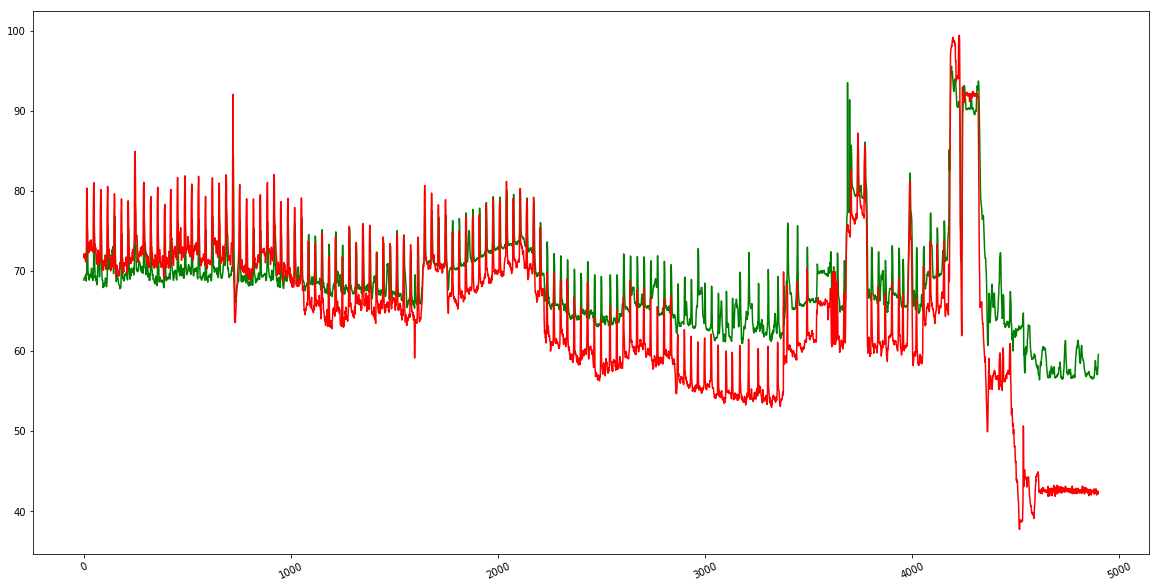

In [28]:
print('size of actual op: ',y_multiple_test_op.size)
print('size of predicted op: ',yhat.size)
plt.plot(yhat,color='green')
plt.plot(y_multiple_test_op,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_multiple_test_op,yhat)
print(Error)

49.270451907664636


In [30]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_multiple_test_op,yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.019


In [60]:
test_value=test_new.loc[24000:24050,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
test_value= test_value.set_index('dateTime')
test_value=test_value.loc[::-1]
test_value_array=np.array(test_value)
test_value_array=test_value_array[0:len(test_value_array)]

In [61]:
x_test, y_test = split_sequences(test_value_array, n_steps)
print(x_test.shape)
x_input = x_test.reshape((x_test.shape[0], n_steps, n_features))

(51, 1, 4)


In [62]:
y_pred=model.predict(x_input)

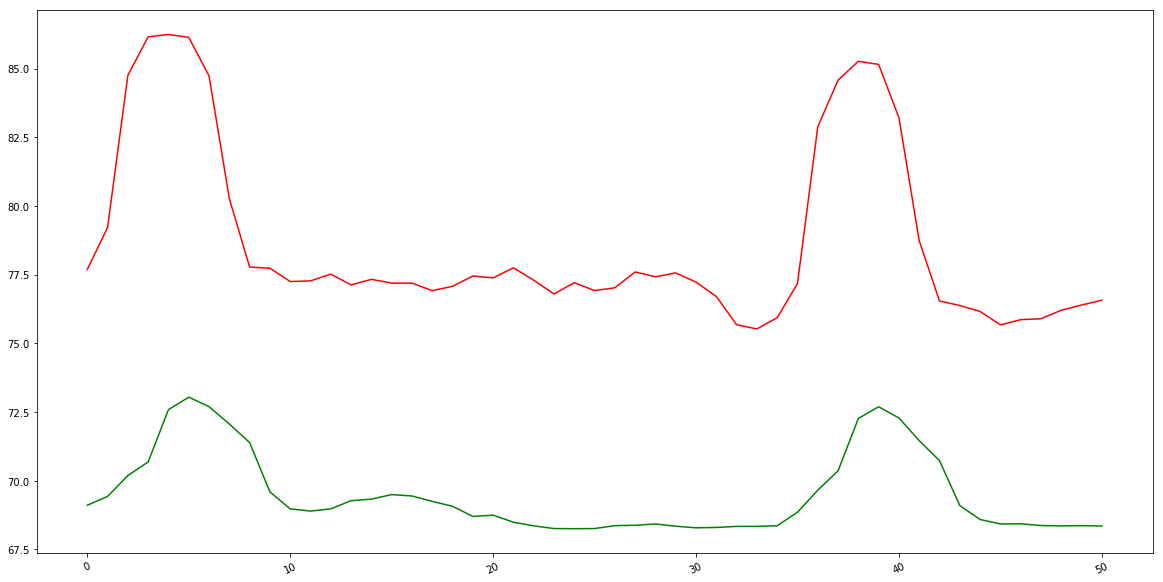

In [63]:
plt.plot(y_pred,color='green')
plt.plot(y_test,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_test,y_pred)
print(Error)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

88.41791827031093
9.403080254379994
